In [75]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Ftrl
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelEncoder

In [76]:
def plot_history(history, filename=""):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    epochs = range(1, len(loss) + 1)
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,10))
    fig.suptitle('Loss and accuracy')

    ax1.plot(epochs, loss, color="green", label='Training loss')
    ax1.plot(epochs, val_loss, color = "blue", label='Validation loss')
    ax1.legend()

    ax2.plot(epochs, acc, color="green", label='Training acc')
    ax2.plot(epochs, val_acc, color = "blue", label='Validation acc')
    ax2.legend()

    plt.show()

    if (filename != ""):
        plt.savefig(filename)

def print_history(history):
    loss = history['loss']
    val_loss = history['val_loss']
    acc = history['accuracy']
    val_acc = history['val_accuracy']

    print("T loss: {}; V loss: {}; T accuracy: {}; V accuracy: {}"
          .format(loss[-1], val_loss[-1], acc[-1], val_acc[-1]))
    plot_history(history)
    
def print_history_loss(history):
    loss = history['loss']
    acc = history['accuracy']

    print("T loss: {}; T accuracy: {};".format(loss[-1], acc[-1]))
    
    epochs = range(1, len(loss) + 1)
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18,10))
    fig.suptitle('Loss and accuracy')
    ax1.plot(epochs, loss, color="green", label='Loss')
    ax1.legend()
    ax2.plot(epochs, acc, color="green", label='Accuracy')
    ax2.legend()
    plt.show()


def print_history_mae(history, filename=""):
    mae = history['mae']
    val_mae = history['val_mae']
    epochs = range(1, len(mae) + 1)
    print("T mae: {}; V mae: {};".format(mae[-1], val_mae[-1]))
    plt.plot(epochs, mae, color='green', label='Training mae')
    plt.plot(epochs, val_mae, color='blue', label='Validation mae')
    plt.title('Mean absolute error')
    plt.legend()
    plt.show()

    if (filename != ""):
        plt.savefig(filename)

def print_average(mae_arr, val_mae_arr):
    avg_mae = np.average(mae_arr, axis=0)
    avg_val_mae = np.average(val_mae_arr, axis=0)
    epochs = range(1, len(avg_mae) + 1)
    plt.plot(epochs, avg_mae, color='green', label='Training mae')
    plt.plot(epochs, avg_val_mae, color='blue', label='Validation mae')
    plt.title('Average mae')
    plt.legend()
    plt.show()

In [84]:
def load_image_array():
    print("Image file (write):")
    path = input()
    try:
        img = Image.open(path).convert('LA').resize((28, 28), Image.ANTIALIAS)
        arr = np.asarray(img)
        if arr[0][0].ndim != 0:
            print("Doing rgb to bw conversion")
            res = np.zeros((len(arr), len(arr[0])), dtype=int)
            for i in range(len(arr)):
                for j in range(len(arr[0])):
                    res[i][j] = arr[i][j][0]
            arr = res
        arr = arr / 255.0
        print("Image loaded")
        plt.imshow(img)
        return np.array([arr])
    except PermissionError:
        print("Error: Permission denied")
        return None
    except FileNotFoundError:
        print("Error: File doesn't exists")
        return None
    except Exception as e:
        print("Error: Image loading error:" + e)
        return None

def predict(img):
    pred = model.predict(img)
    print(np.argmax(pred))

In [5]:
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 2s 0us/step


313/313 [==============================] - 0s 896us/step - loss: 0.1200 - accuracy: 0.9775
test_acc: 0.9775000214576721
T loss: 0.01727832667529583; T accuracy: 0.9942333102226257;


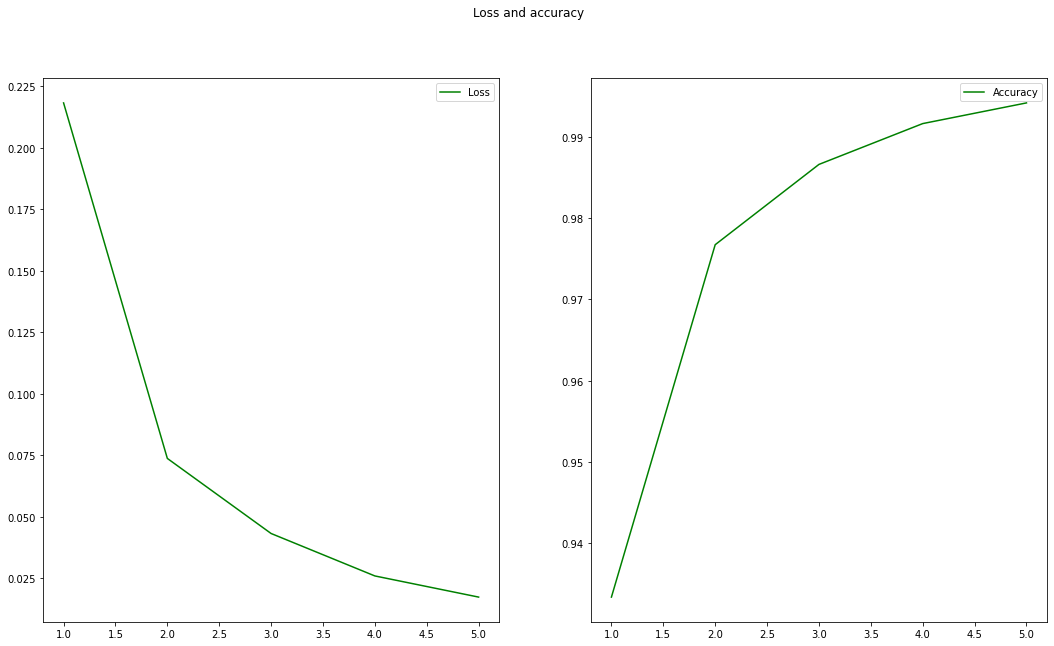

In [69]:
# Create
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile and train

# optimizer = SGD() #learning_rate=0.1, momentum=0.9, nesterov=True
# optimizer = RMSprop(learning_rate=0.0001, rho=0.999, centered=True)
# optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
# optimizer = Adadelta()
# optimizer = Adagrad()
# optimizer = Adamax()
optimizer = Nadam(learning_rate=0.01, beta_1=0.999, beta_2=0.9999)
# optimizer = Ftrl()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=False)
# Test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print_history_loss(history.history)


(225, 28, 28)


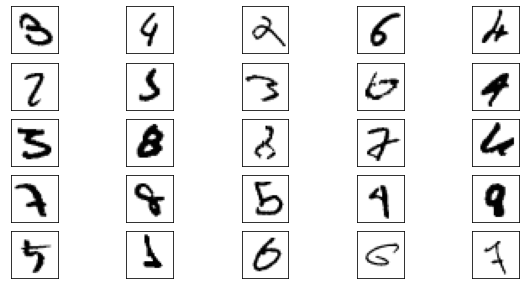

In [70]:
# Show errors
(train_images_raw, train_labels_raw),(test_images_raw, test_labels_raw) = mnist.load_data()
test_images_raw = test_images_raw / 255.0

pred = model.predict(test_images_raw)
pred = np.argmax(pred, axis=1)
mask = np.equal(pred, test_labels_raw)

x_false = test_images_raw[~mask]
y_false = test_images_raw[~mask]

print(x_false.shape)
# First 25 wrong numbers
plt.figure(figsize=(10,5))
for i in range(25):
    if (i >= len(x_false) - 1): 
        break
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

Image file (write):


 img3.png


Doing rgb to bw conversion
Image loaded
3


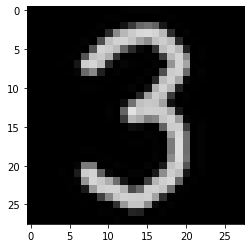

In [95]:
img_arr = load_image_array()
pred = model.predict(img_arr)
print(np.argmax(pred))